# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Berliana Aulia Mahdi
- **Email:** berliana.22095@mhs.unesa.ac.id
- **ID Dicoding:** berlianaulia

## Menentukan Pertanyaan Bisnis

- Pada waktu kapan jumlah penyewa sepeda paling sedikit? Apakah di pagi, siang, malam, atau sore?
- Berapa banyak orang yang memilih menjadi pengguna terdaftar dibandingkan dengan pengguna kasual?
- Bagaimana tren peminjaman sepeda oleh pelanggan dalam 2 tahun terakhir?
- Apakah ada pengaruh kecepatan angin terhadap jumlah penyewa sepeda (baik kasual maupun terdaftar)?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
# Menampilkan dataset day.csv
days_df = pd.read_csv("Data/day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
# Menampilkan dataset hour.csv
hours_df = pd.read_csv("Data/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
Dataset mencakup data penyewaan sepeda dalam skala harian (day.csv) maupun jam (hour.csv) yang berarti kita dapat menganalisis data dalam berbagai tingkatan waktu.

### Assessing Data

In [7]:
# Menilai data days_df dengan memeriksa tipe data dari setiap kolom pada days_df.
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
# Menilai data hours_df dengan memeriksa tipe data dari setiap kolom pada days_df.
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**

Bisa kita lihat tipe data dari kolom-kolom dalam dataframe days_df dan hours_df kelihatannya sudah hampir tepat, tetapi ada yang perlu diperhatikan yaitu:
- kolom dteday dengan tipe data object (string) dapat diperbaiki menjadi tipe datetime. Hal ini dapat kita lakukan pada tahap cleaning data.
- kolom season, holiday, weekday, workingday, dan weathersit merupakan kategori sehingga bisa diubah ke tipe category. Hal ini dapat kita lakukan pada tahap cleaning data.

In [9]:
# Memeriksa apakah ada missing values pada days_df
days_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
# Memeriksa apakah ada missing values pada hours_df
hours_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
Dapat kita lihat bahwa tidak ada missing values di dataframe days_df dan hours_df. 

In [11]:
# memeriksa duplikasi pada days_df dan hours_df
print("Total duplikasi days_df: ", days_df.duplicated().sum())
print("Total duplikasi hours_df: ", hours_df.duplicated().sum())

Total duplikasi days_df:  0
Total duplikasi hours_df:  0


**Insight:**
Dapat kita lihat bahwa tidak ada duplikasi data di dataframe days_df dan hours_df. 

In [12]:
# memeriksa parameter statistik days_df
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [13]:
# memeriksa parameter statistik hours_df
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Dari hasil asessing data, kita perlu mengubah menjadi tipe datetime pada kolom dteday dari yang sebelumnya bertipe object.

In [14]:
# Mengubah tipe data pada kolom dteday menjadi tipe datetime
days_df["dteday"] = pd.to_datetime(days_df["dteday"])
hours_df["dteday"] = pd.to_datetime(hours_df["dteday"])

days_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [15]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Dari hasil asessing data, kita perlu mengubah menjadi tipe category pada kolom season, mnth, holiday, weekday, workingday, dan weathersit.

In [16]:
# Mengubah kolom season, mnth, holiday, weekday, workingday, dan weathersit menjadi tipe category
columns = ["season", "mnth", "holiday", "weekday", "workingday", "weathersit"]

for column in columns:
    days_df[column] = days_df[column].astype('category')
    hours_df[column] = hours_df[column].astype('category')


days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

In [17]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Agar data-data tersebut dapat lebih mudah dipahami, kita dapat ubah nilai-nilai pada kolom season, mnth, weathersit, weekday, dan year supaya lebih informatif.

In [18]:
# Definisi dictionary untuk mapping penggantian nilai
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
mnth_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
weathersit_mapping = {1: 'Clear', 2: 'Misty', 3: 'Light_rainsnow', 4: 'Heavy_rainsnow'}
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
year_mapping = {0: '2011', 1: '2012'}

days_df['season'] = days_df['season'].replace(season_mapping)
hours_df['season'] = hours_df['season'].replace(season_mapping)

days_df['mnth'] = days_df['mnth'].replace(mnth_mapping)
hours_df['mnth'] = hours_df['mnth'].replace(mnth_mapping)

days_df['weathersit'] = days_df['weathersit'].replace(weathersit_mapping)
hours_df['weathersit'] = hours_df['weathersit'].replace(weathersit_mapping)

days_df['weekday'] = days_df['weekday'].replace(weekday_mapping)
hours_df['weekday'] = hours_df['weekday'].replace(weekday_mapping)

days_df['yr'] = days_df['yr'].replace(year_mapping)
hours_df['yr'] = hours_df['yr'].replace(year_mapping)


In [19]:
# mengganti nama kolom agar mudah dibaca

days_df.rename(columns={'yr':'year','mnth':'month', 'weathersit':'weather situation','cnt':'count_cr','hum':'humidity'},inplace=True)
hours_df.rename(columns={'yr':'year','mnth':'month', 'hr':'hour', 'weathersit':'weather situation','cnt':'count_cr','hum':'humidity'},inplace=True)

In [20]:
days_df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather situation,temp,atemp,humidity,windspeed,casual,registered,count_cr
0,1,2011-01-01,Spring,2011,Jan,0,Saturday,0,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sunday,0,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [21]:
hours_df.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather situation,temp,atemp,humidity,windspeed,casual,registered,count_cr
0,1,2011-01-01,Spring,2011,Jan,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


Membuat kolom baru dengan nama time_of_day. Tujuan dari pengelompokan jam (hour) ke dalam kategori time_of_day seperti "Pagi", "Siang", "Sore", dan "Malam" adalah untuk memberikan konteks temporal yang lebih jelas saat melakukan analisis data.

In [22]:
def time_of_day(hour):
    if 6 <= hour <= 11:
        return 'Pagi'
    elif 12 <= hour <= 15:
        return 'Siang'
    elif 16 <= hour <= 18:
        return 'Sore'
    else:
        return 'Malam'

hours_df['time_of_day'] = hours_df['hour'].apply(time_of_day)
print(hours_df.head())

   instant     dteday  season  year month  hour holiday   weekday workingday  \
0        1 2011-01-01  Spring  2011   Jan     0       0  Saturday          0   
1        2 2011-01-01  Spring  2011   Jan     1       0  Saturday          0   
2        3 2011-01-01  Spring  2011   Jan     2       0  Saturday          0   
3        4 2011-01-01  Spring  2011   Jan     3       0  Saturday          0   
4        5 2011-01-01  Spring  2011   Jan     4       0  Saturday          0   

  weather situation  temp   atemp  humidity  windspeed  casual  registered  \
0             Clear  0.24  0.2879      0.81        0.0       3          13   
1             Clear  0.22  0.2727      0.80        0.0       8          32   
2             Clear  0.22  0.2727      0.80        0.0       5          27   
3             Clear  0.24  0.2879      0.75        0.0       3          10   
4             Clear  0.24  0.2879      0.75        0.0       0           1   

   count_cr time_of_day  
0        16       Malam 

In [23]:
# setelah menambahkan kolom baru, cek lagi apakah terdapat missing values
hours_df.isna().sum()

instant              0
dteday               0
season               0
year                 0
month                0
hour                 0
holiday              0
weekday              0
workingday           0
weather situation    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
count_cr             0
time_of_day          0
dtype: int64

In [24]:
def classify_windspeed(windspeed):
    if windspeed < 0.2:
        return "Angin Ringan"
    elif 0.2 <= windspeed < 0.35:
        return "Angin Sedang"
    else:
        return "Angin Kencang"

# Terapkan klasifikasi ke kolom baru
days_df['windspeed_category'] = days_df['windspeed'].apply(classify_windspeed)
hours_df['windspeed_category'] = hours_df['windspeed'].apply(classify_windspeed)


In [25]:
# setelah menambahkan kolom baru, cek lagi apakah terdapat missing values
hours_df.isna().sum()
days_df.isna().sum()

instant               0
dteday                0
season                0
year                  0
month                 0
holiday               0
weekday               0
workingday            0
weather situation     0
temp                  0
atemp                 0
humidity              0
windspeed             0
casual                0
registered            0
count_cr              0
windspeed_category    0
dtype: int64

In [26]:
days_df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather situation,temp,atemp,humidity,windspeed,casual,registered,count_cr,windspeed_category
0,1,2011-01-01,Spring,2011,Jan,0,Saturday,0,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985,Angin Ringan
1,2,2011-01-02,Spring,2011,Jan,0,Sunday,0,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801,Angin Sedang
2,3,2011-01-03,Spring,2011,Jan,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Angin Sedang
3,4,2011-01-04,Spring,2011,Jan,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Angin Ringan
4,5,2011-01-05,Spring,2011,Jan,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Angin Ringan


In [27]:
hours_df.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather situation,temp,atemp,humidity,windspeed,casual,registered,count_cr,time_of_day,windspeed_category
0,1,2011-01-01,Spring,2011,Jan,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16,Malam,Angin Ringan
1,2,2011-01-01,Spring,2011,Jan,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40,Malam,Angin Ringan
2,3,2011-01-01,Spring,2011,Jan,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32,Malam,Angin Ringan
3,4,2011-01-01,Spring,2011,Jan,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13,Malam,Angin Ringan
4,5,2011-01-01,Spring,2011,Jan,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1,Malam,Angin Ringan


**Insight:**

Kita telah melakukan:
- Mengonversi isi nilai kolom pada kolom season, month, weather situation, weekday, dan year.
- Mengubah tipe data pada kolom dteday menjadi tipe datetime
- Mengubah tipe data pada kolom season, mnth, holiday, weekday, workingday, dan weathersit menjadi tipe category

## Exploratory Data Analysis (EDA)

### Explore days_df

In [28]:
# melihat rangkuman parameter statistik dari data days_df 
days_df.describe(include="all")

,instant,dteday,season,year,month,holiday,weekday,workingday,weather situation,temp,atemp,humidity,windspeed,casual,registered,count_cr,windspeed_category
count,731.000000,731,731,731,731,731.0,731,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,NaN,4,2,12,2.0,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,Fall,2012,Jan,0.0,Sunday,1.0,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angin Ringan
freq,NaN,NaN,188,366,62,710.0,105,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,436
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN


In [29]:
# melihat jumlah pelanggan yang menyewa sepeda tiap tahun berdasarkan pengguna kasual dan yang sudah terdaftar
days_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


Pada tabel di atas menunjukkan perbedaan yang signifikan antara jumlah pengguna yang sudah terdaftar (registered) dan pengguna kasual. Pengguna yang terdaftar di tahun 2011 mencapai 995.851 orang, jauh lebih banyak dibandingkan pengguna kasual yang hanya 247.252 orang. Sedangkan pada tahun 2012 sebanyak 1.676.811 orang yang sudah menjadi pengguna terdaftar dan 372.765 orang yang memilih untuk menjadi pengguna kasual saja.

In [30]:
correlation_casual = days_df['windspeed'].corr(days_df['casual'])
correlation_registered = days_df['windspeed'].corr(days_df['registered'])

print(f"Korelasi antara kecepatan angin dan penyewa casual: {correlation_casual}")
print(f"Korelasi antara kecepatan angin dan penyewa registered: {correlation_registered}")


Korelasi antara kecepatan angin dan penyewa casual: -0.16761334930380692
Korelasi antara kecepatan angin dan penyewa registered: -0.21744898143250357


### Explore hours_df

In [31]:
hours_df.describe(include="all")

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather situation,temp,atemp,humidity,windspeed,casual,registered,count_cr,time_of_day,windspeed_category
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379.0,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,4,2,12,NaN,2.0,7,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3
top,NaN,NaN,Fall,2012,May,NaN,0.0,Saturday,1.0,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Malam,Angin Ringan
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,11865.0,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7916,10312
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


Berdasarkan data yang ditampilkan range antara jam 00.00 sampai 23.59, memilliki rata-rata penyewaan sepeda terjadi pada jam 11.54 (malam hari) dengan standar deviasinya sebesar 6.91.

In [32]:
# Penyewaan berdasarkan waktu
hours_df.groupby(by="time_of_day").agg({
    "count_cr": ["sum"]
})

,count_cr
,sum
time_of_day,
Malam,782846
Pagi,907319
Siang,728134
Sore,874380


Berdasarkan hasil tersebut, dapat kita lihat bahwa sedikit pelanggan yang menyewa sepeda pada siang hari.

**Insight:**
Pada explore days_df:
- Kita perlu mengetahui rangkuman parameter statistik
- Mengetahui jumlah pelanggan yang menyewa sepeda tiap tahun berdasarkan pengguna kasual dan yang sudah terdaftar untuk membantu menjawab pertanyaan bisnis kedua
- Mengetahui korelasi antara kecepatan angin dan banyak pelanggan yang menyewa sepeda untuk membantu menjawab pertanyaan bisnis keempat

Pada explore hours_df:
- Kita perlu mengetahui rangkumman parameter statistik
- Mengetahui jumlah pelanggan yang menyewa sepeda berdasarkan waktu (pagi, siang, sore, atau malam hari) untuk membantu menjawab pertanyaan bisnis pertama


## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada waktu kapan jumlah penyewa sepeda paling sedikit? Apakah di pagi, siang, malam, atau sore hari?


C:\Users\ASUS\AppData\Local\Temp\ipykernel_39084\2908212904.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="time_of_day", y="count_cr", data=sum_rental_items_df.sort_values(by="count_cr", ascending=True).head(4), palette=["#9b7f6f", "#D3D3D3", "#D3D3D3", "#D3D3D3"])


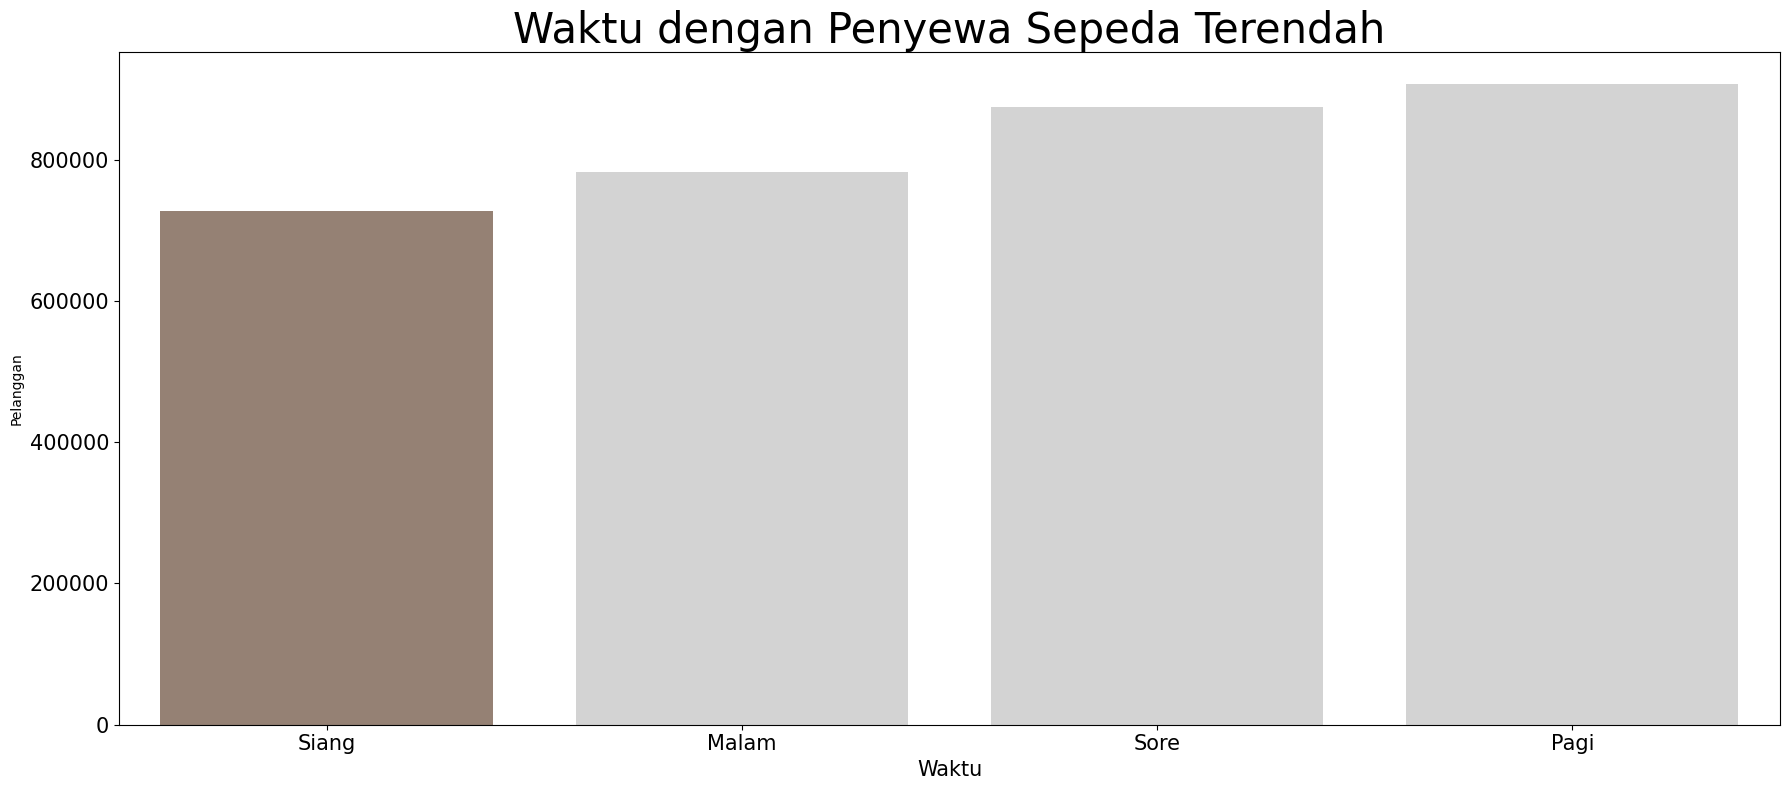

In [33]:
# Melakukan grouping terhadap time_of_day dan count_cr 
sum_rental_items_df = hours_df.groupby("time_of_day").count_cr.sum().reset_index()

# Membuat satu bar chart untuk melihat waktu dengan sedikit penyewa sepeda
plt.figure(figsize=(18, 8))

# Membuat barplot untuk waktu dengan sedikit penyewa sepeda
sns.barplot(x="time_of_day", y="count_cr", data=sum_rental_items_df.sort_values(by="count_cr", ascending=True).head(4), palette=["#9b7f6f", "#D3D3D3", "#D3D3D3", "#D3D3D3"])

# Mengatur label dan judul
plt.ylabel("Pelanggan")
plt.xlabel("Waktu", fontsize=15)
plt.title("Waktu dengan Penyewa Sepeda Terendah", loc="center", fontsize=30)
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)

# Menampilkan plot
plt.tight_layout()
plt.show()


Berdasarkan gambar di atas, jumlah penyewa sepeda paling sedikit adalah pada waktu siang hari yaitu 72.8134 penyewaan.

### Pertanyaan 2: Berapa banyak orang yang memilih menjadi pengguna terdaftar dibandingkan dengan pengguna kasual?

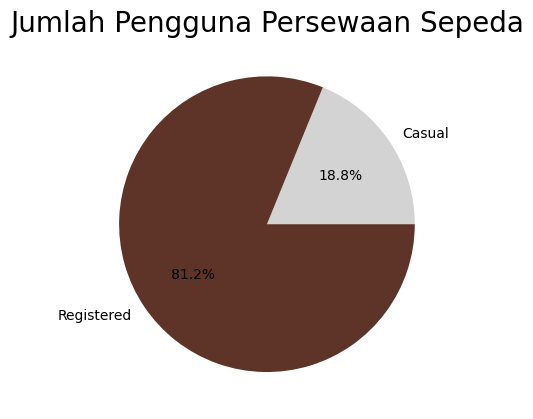

In [34]:
# Menjumlahkan semua elemen dalam kolom casual
numbers_of_casual = sum(days_df['casual'])

# Menjumlahkan semua elemen dalam kolom registered
numbers_of_registered = sum(days_df['registered'])

# Membuat data untuk pie plot
data = [numbers_of_casual, numbers_of_registered]
labels = ['Casual', 'Registered']

# Membuat pie plot
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#D3D3D3", "#5D3427"])
plt.title("Jumlah Pengguna Persewaan Sepeda", loc="center", fontsize=20)
plt.show()

Berdasarkan pie chart tersebut dapat disimpulkan bahwa mayoritas pengguna persewaan sepeda adalah pengguna yang terdaftar (registered) yaitu sebesar 81.2%, sedangkan pengguna kasual (casual) hanya sebesar 18.8%. Hal ini menandakan bahwa sebagian besar penyewa sepeda lebih memilih untuk mendaftar menjadi pelanggan tetap/pelanggan terdaftar (registered) daripada hanya menggunakan layanan sesekali.

### Pertanyaan 3: Bagaimana tren peminjaman sepeda oleh pelanggan dalam 2 tahun terakhir?

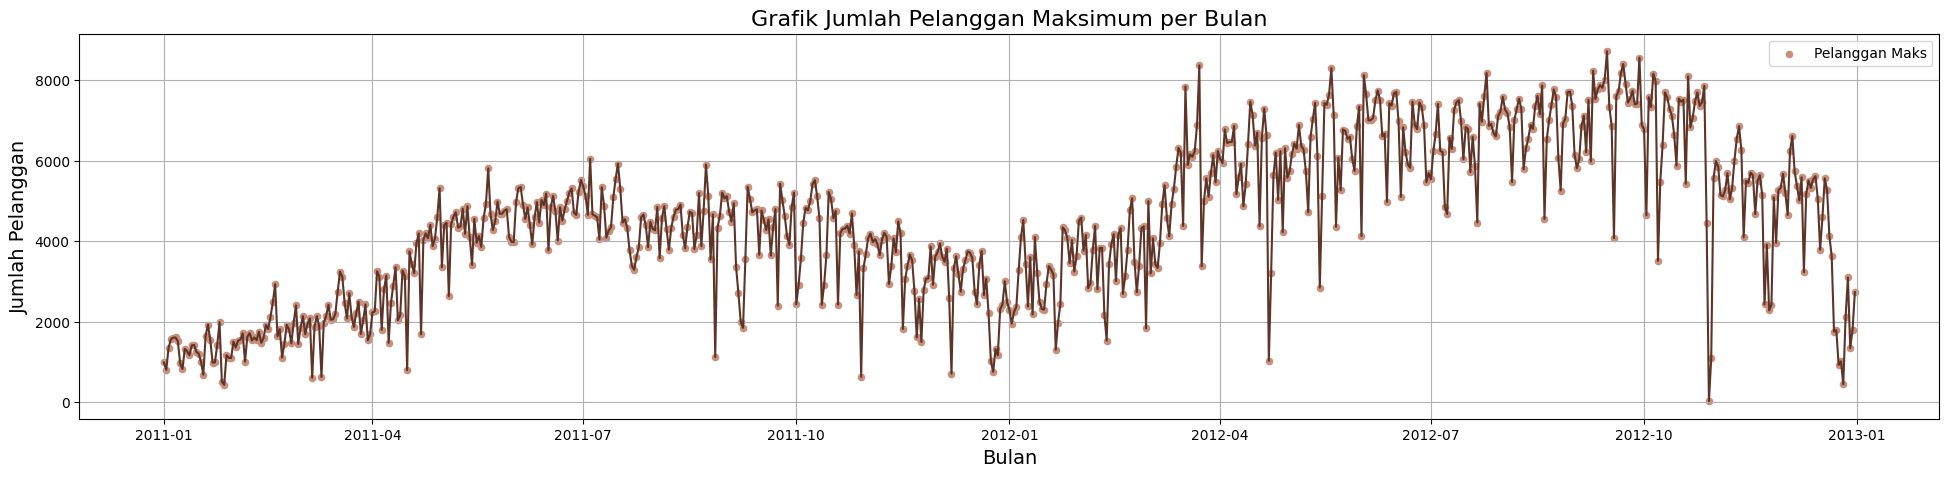

In [35]:
# Membuat figure dengan ukuran (24, 5)
plt.figure(figsize=(24, 5))
# Menghitung jumlah pelanggan maksimum per bulan
rentals_per_month = days_df['count_cr'].groupby(days_df['dteday']).max()
# Membuat scatter plot untuk jumlah pelanggan maksimum per bulan dengan warna coklat dan marker 'o'
plt.scatter(rentals_per_month.index, rentals_per_month.values, c="#c88f7d", s=20, marker='o', label="Pelanggan Maks")

# Membuat line plot untuk jumlah pelanggan maksimum per bulan
plt.plot(rentals_per_month.index, rentals_per_month.values, linestyle='-', color='#5D3427')
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Jumlah Pelanggan', fontsize=14)
plt.title('Grafik Jumlah Pelanggan Maksimum per Bulan', fontsize=16)

# Menampilkan grid untuk mempermudah interpretasi
plt.grid(True)

plt.legend()
plt.show()


Dari hasil visualisasi di atas dapat kita simpulkan bahwa pada awal 2011, jumlah peminjaman sepeda cukup rendah. Namun, seiring waktu, terjadi peningkatan yang cukup stabil dan di pertengahan tahun 2011 menunjukkan peningkatan yang signifikan. Lonjakan ini menunjukkan bahwa lebih banyak pelanggan mulai menggunakan layanan peminjaman sepeda ini. Namun, di akhir tahun 2011 terlihat penurunan yang tajam.

Memasuki awal 2012, jumlah peminjaman mulai pulih dan meningkat kembali dan kemudian terjadi lonjakan signifikan dalam jumlah peminjaman pada pertengahan 2012. Hal ini menunjukkan popularitas yang meningkat untuk peminjaman sepeda. Pada bulan september terlihat puncak tertinggi dalam jumlah peminjaman. Namun, di akhir tahun 2012 terlihat penurunan yang tajam dalam jumlah peminjaman.

### Pertanyaan 4: Apakah ada pengaruh kecepatan angin terhadap jumlah penyewa sepeda?

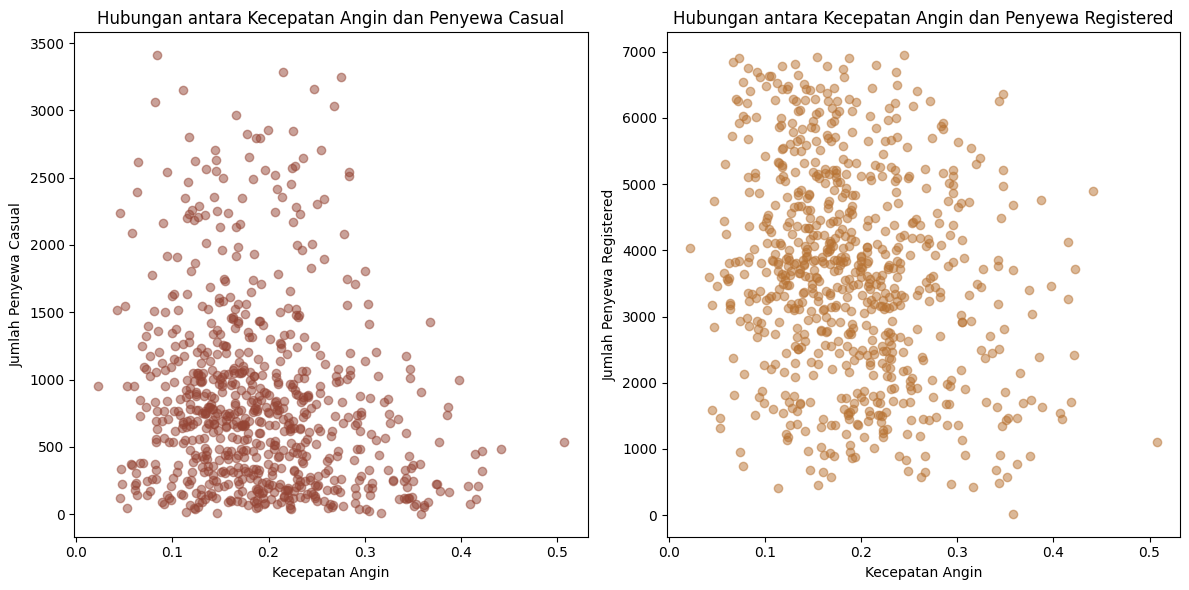

In [36]:
plt.figure(figsize=(12,6))

# Scatter plot untuk penyewa casual
plt.subplot(1, 2, 1)
plt.scatter(days_df['windspeed'], days_df['casual'], color='#954535', alpha=0.5)
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Penyewa Casual')
plt.title('Hubungan antara Kecepatan Angin dan Penyewa Casual')

# Scatter plot untuk penyewa registered
plt.subplot(1, 2, 2)
plt.scatter(days_df['windspeed'], days_df['registered'], color='#B87333', alpha=0.5)
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Penyewa Registered')
plt.title('Hubungan antara Kecepatan Angin dan Penyewa Registered')

plt.tight_layout()
plt.show()

Pada grafik kiri (Hubungan antara Kecepatan Angin dan Penyewa Casual) menunjukkan bahwa seiring meningkatnya kecepatan angin, jumlah penyewa casual cenderung berkurang. Hal ini dapat dilihat dari titik-titik pada scatter plot lebih banyak terkonsentrasi di kecepatan angin rendah dan semakin jarang ketika kecepatan angin meningkat. Penyebaran data dalam grafik tersebut terlihat cukup acak, namun cenderung berkorelasi negatif dengan korelasi sebesar -0.16761334930380692.

Pada grafik kanan (Hubungan antara Kecepatan Angin dan Jumlah Penyewa Registered) juga menunjukkan bahwa seiring meningkatnya angin, jumlah penyewa registered cenderung berkurang. Namun, penurunan jumlah penyewa registered tidak setajam penurunan pada penyewa casual. Korelasi antara kecepatan angin dan penyewa registered adalah -0.21744898143250357

## Analisis Lanjutan (Opsional)

#### Total Penyewa Sepeda Berdasarkan Kategori Windspeed


Dengan menggunakan analisis cluster didapatkan:

In [43]:
hours_df.groupby(by="windspeed_category").count_cr.nunique().sort_values(ascending=False)


windspeed_category
Angin Ringan     791
Angin Sedang     759
Angin Kencang    546
Name: count_cr, dtype: int64

Dari hasil tersebut, kita dapat mengidentifikasi kelompok pengguna yang lebih cenderung menyewa sepeda ketika kondisi angin ringan.

#### RFM Analysis


In [44]:
rfm_df = hours_df.groupby(by="registered", as_index=False).agg({
    "instant": "count", #frequency
    "count_cr": "max", #monetary
    "dteday": lambda x: (pd.Timestamp.now() - x.max()).days #recency
})

rfm_df.columns = ["registered", "frequency", "monetary", "recency"]
rfm_df.head()


,registered,frequency,monetary,recency
0,0,24,4,4329
1,1,201,7,4291
2,2,245,16,4292
3,3,294,14,4291
4,4,307,21,4294


C:\Users\ASUS\AppData\Local\Temp\ipykernel_33528\3803754611.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="registered", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_33528\3803754611.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="registered", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_33528\3803754611.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for 

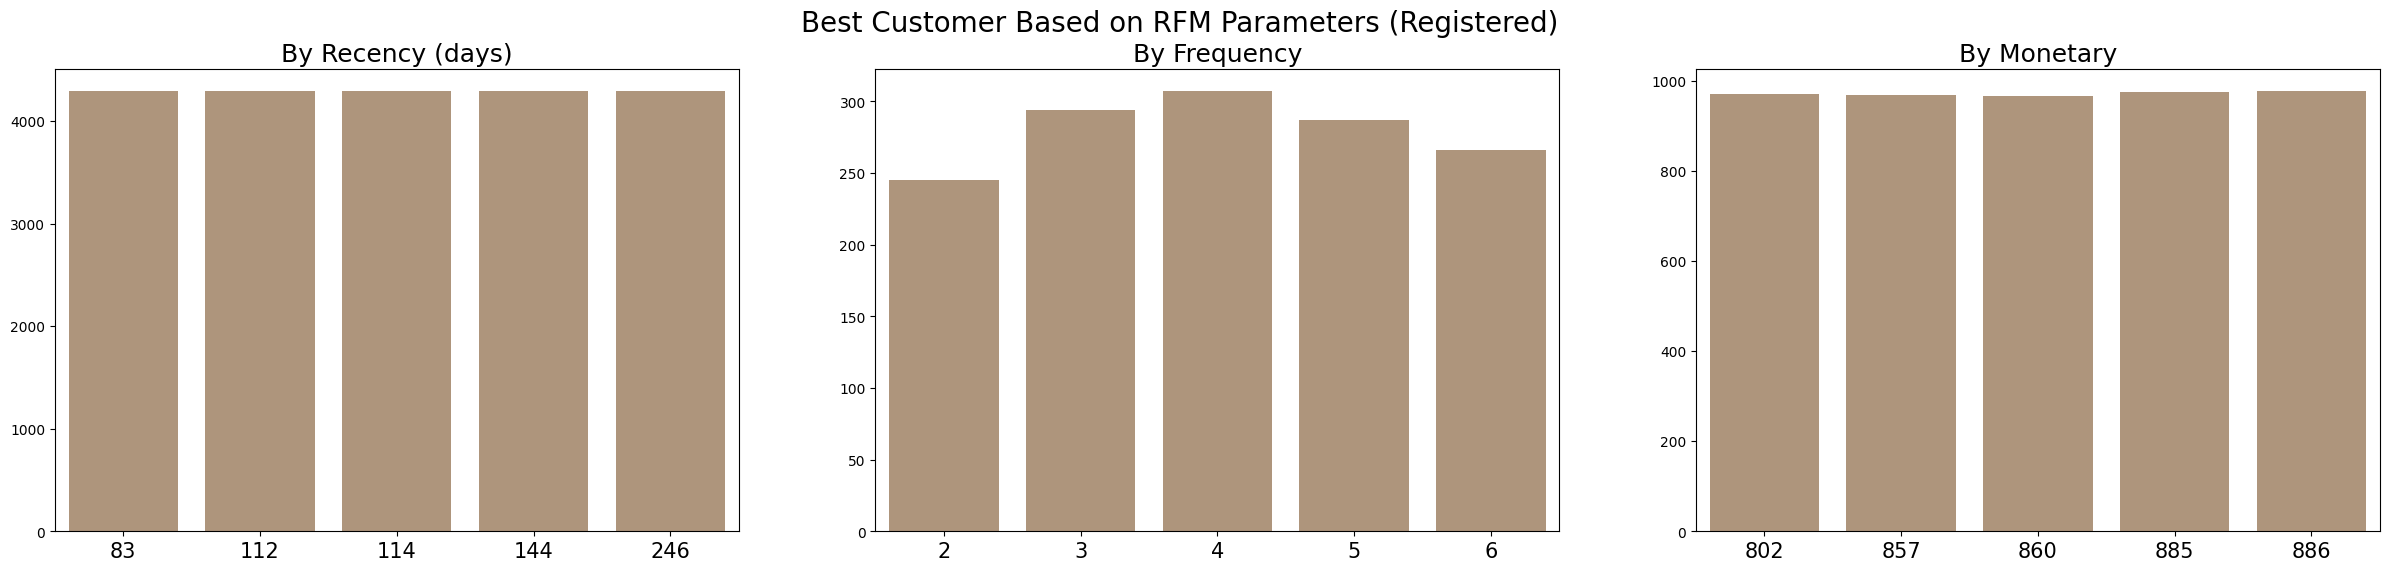

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#B69574", "#B69574", "#B69574", "#B69574", "#B69574"]

sns.barplot(y="recency", x="registered", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="registered", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="registered", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (Registered)", fontsize=20)
plt.show()

Grafik di atas merupakan analisis RFM dari lima pelanggan registered dengan tingkat sewa sepeda tertinggi

In [46]:
rfm_df = hours_df.groupby(by="casual", as_index=False).agg({
    "instant": "count", #frequency
    "count_cr": "max", #monetary
    "dteday": lambda x: (pd.Timestamp.now() - x.max()).days #recency
})

rfm_df.columns = ["casual", "frequency", "monetary", "recency"]
rfm_df.head()


,casual,frequency,monetary,recency
0,0,1581,300,4291
1,1,1082,448,4292
2,2,798,365,4291
3,3,697,513,4291
4,4,561,520,4291


C:\Users\ASUS\AppData\Local\Temp\ipykernel_33528\731790431.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="casual", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_33528\731790431.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="casual", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_33528\731790431.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same ef

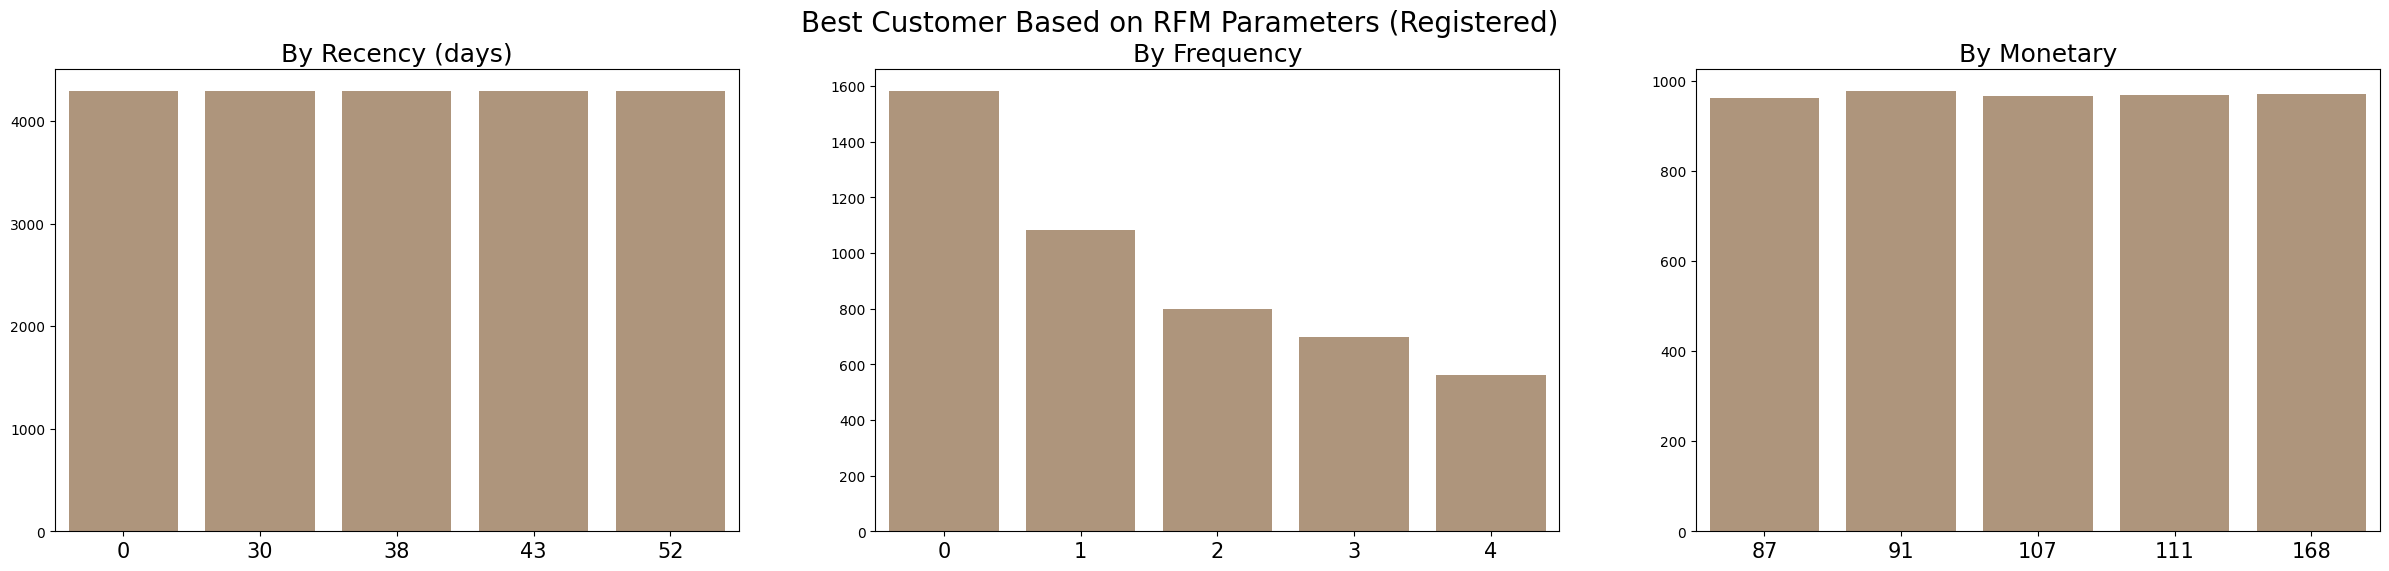

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#B69574", "#B69574", "#B69574", "#B69574", "#B69574"]

sns.barplot(y="recency", x="casual", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="casual", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="casual", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (Registered)", fontsize=20)
plt.show()

Grafik di atas merupakan analisis RFM dari lima pelanggan casual dengan tingkat sewa sepeda tertinggi.

## Conclusion

- Jumlah penyewa sepeda paling sedikit adalah pada waktu siang hari yaitu 72.8134 penyewaan.
- Mayoritas pengguna persewaan sepeda adalah pengguna yang terdaftar (registered) yaitu sebesar 81.2%.
- Dari hasil visualisasi di atas dapat kita simpulkan bahwa pada awal 2011, jumlah peminjaman sepeda cukup rendah. Namun, seiring waktu, terjadi peningkatan yang cukup stabil dan di pertengahan tahun 2011 menunjukkan peningkatan yang signifikan. Kemudian di akhir 2011 mengalami penurunan yang cukup banyak. Memasuki awal 2012 terjadi lonjakan signifikan. Pada bulan september 2012 terlihat puncak tertinggi dalam jumlah peminjaman. Namun, di akhir tahun 2012 terlihat penurunan yang tajam dalam jumlah peminjaman.
- Baik penyewa sepeda yang terdaftar maupun kasual menunjukkan korelasi negatif terhadap kecepatan angin hal ini berarti seiring meningkatnya kecepatan angin, jumlah penyewa sepeda cenderung berkurang.

In [51]:
hours_df.to_csv("hour_clean.csv", index=False)

In [52]:
days_df.to_csv("day_clean.csv", index=False)

In [50]:
# Menggabungkan file hours_df dan days_df
all_df = pd.concat([hours_df, days_df], ignore_index=True)

# Menyimpan data gabungan ke dalam file CSV
all_df.to_csv("all_data.csv", index=False)